## GROUP 4

## P-621- Book Recommendation
    Business Objective:
    Generate the features from the dataset and use them to recommend the books accordingly to the users.


## EDA- Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("Users.csv")
df2=pd.read_csv("Books.csv")
df3=pd.read_csv("Ratings.csv")

In [3]:
print("===== df1 : Users Dataset =====")
display(df1.head())

print("\n===== df2 : Books Dataset =====")
display(df2.head())

print("\n===== df3 : Ratings Dataset =====")
display(df3.head())

===== df1 : Users Dataset =====


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN



===== df2 : Books Dataset =====


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...



===== df3 : Ratings Dataset =====


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
print("Users shape:", df1.shape)
print("Books shape:", df2.shape)
print("Ratings shape:", df3.shape)

Users shape: (278858, 3)
Books shape: (271360, 8)
Ratings shape: (1149780, 3)


In [5]:
print("===== df1 : Users Dataset Info =====")
df1.info()

print("\n\n===== df2 : Books Dataset Info =====")
df2.info()

print("\n\n===== df3 : Ratings Dataset Info =====")
df3.info()

===== df1 : Users Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


===== df2 : Books Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null 

In [6]:
print("===== df1 : Users Dataset Data Types =====")
print(df1.dtypes)

print("\n===== df2 : Books Dataset Data Types =====")
print(df2.dtypes)

print("\n===== df3 : Ratings Dataset Data Types =====")
print(df3.dtypes)

===== df1 : Users Dataset Data Types =====
User-ID       int64
Location     object
Age         float64
dtype: object

===== df2 : Books Dataset Data Types =====
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

===== df3 : Ratings Dataset Data Types =====
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object


In [7]:
df1.select_dtypes(include=["int64","float64"]).columns
df2.select_dtypes(include=["int64","float64"]).columns
df3.select_dtypes(include=["int64","float64"]).columns


Index(['User-ID', 'Book-Rating'], dtype='object')

In [8]:
## Missing Values Handling

In [9]:
print("Missing values in df1 (Users):")
print(df1.isnull().sum())

print("\nMissing values in df2 (Books):")
print(df2.isnull().sum())

print("\nMissing values in df3 (Ratings):")
print(df3.isnull().sum())

Missing values in df1 (Users):
User-ID          0
Location         0
Age         110762
dtype: int64

Missing values in df2 (Books):
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Missing values in df3 (Ratings):
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [10]:
df1["Age"] = pd.to_numeric(df1["Age"], errors="coerce")
df1["Age"].fillna(df1["Age"].median(), inplace=True)
df2["Book-Author"].fillna("Unknown", inplace=True)
df2["Publisher"].fillna("Unknown", inplace=True)
df2["Image-URL-L"].fillna("Not Available", inplace=True)

In [11]:
print("Missing values in df1 (Users):")
print(df1.isnull().sum())

print("\nMissing values in df2 (Books):")
print(df2.isnull().sum())

print("\nMissing values in df3 (Ratings):")
print(df3.isnull().sum())

Missing values in df1 (Users):
User-ID     0
Location    0
Age         0
dtype: int64

Missing values in df2 (Books):
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Missing values in df3 (Ratings):
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [12]:
## Handling Duplicate Values

In [13]:
print("Duplicates in df1:", df1.duplicated().sum())
print("Duplicates in df2:", df2.duplicated().sum())
print("Duplicates in df3:", df3.duplicated().sum())

Duplicates in df1: 0
Duplicates in df2: 0
Duplicates in df3: 0


## VISUALIZATION 

## Outlier detection using Boxplot

In [14]:
def plot_all_boxplots(df, df_name, stage):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=df[col])
        plt.title(f'{df_name} - {col} ({stage})')
        plt.show()

In [15]:
# Outlier sampling 
def outlier_sampling(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr  = q3 - q1 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound 
        else upper_bound if x > upper_bound 
        else x
    )

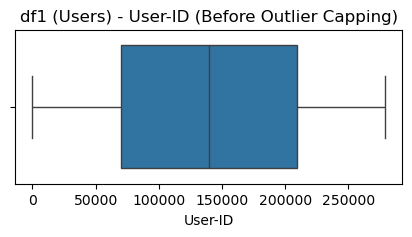

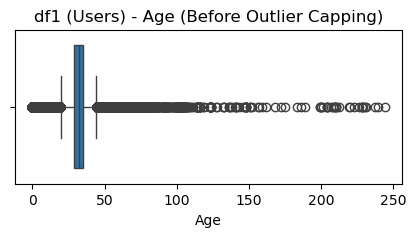

In [16]:
plot_all_boxplots(df1, "df1 (Users)", "Before Outlier Capping")

In [17]:
outlier_sampling(df1, 'Age')

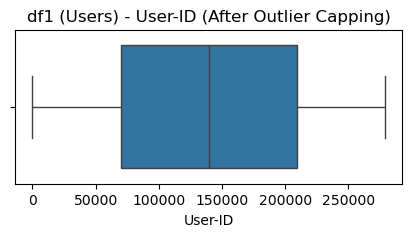

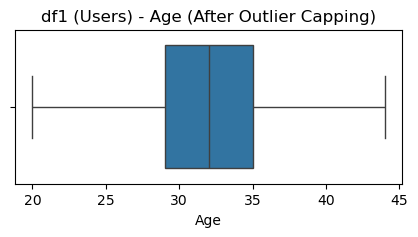

In [18]:
plot_all_boxplots(df1, "df1 (Users)", "After Outlier Capping")

In [19]:
# Convert Year-Of-Publication to numeric for plotting
df2['Year-Of-Publication'] = pd.to_numeric(
    df2['Year-Of-Publication'], errors='coerce'
)

# Handle missing values created during conversion
df2['Year-Of-Publication'].fillna(
    df2['Year-Of-Publication'].median(), inplace=True
)


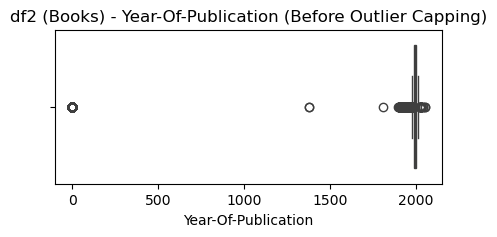

In [20]:
# Before outlier capping (visual inspection only)
plot_all_boxplots(df2, "df2 (Books)", "Before Outlier Capping")

In [21]:
##Domain-based validation instead of IQR capping
# Valid publication years assumed between 1900 and 2025
df2['Year-Of-Publication'] = df2['Year-Of-Publication'].where(
    (df2['Year-Of-Publication'] >= 1900) &
    (df2['Year-Of-Publication'] <= 2025),
    df2['Year-Of-Publication'].median()
)

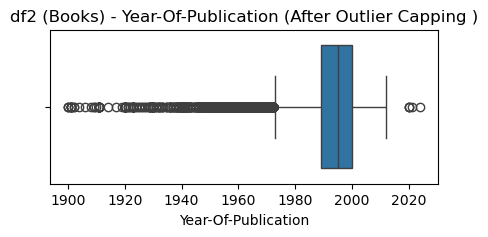

In [22]:
plot_all_boxplots(df2,"df2 (Books)","After Outlier Capping ")

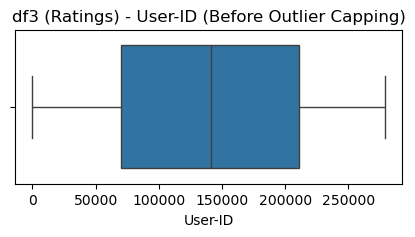

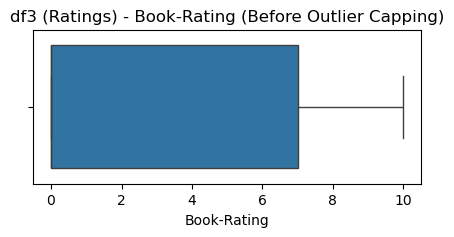

In [23]:
plot_all_boxplots(df3, "df3 (Ratings)", "Before Outlier Capping")

In [24]:
# No outlier capping applied
# Ratings are already bounded (0–10)


## Histograms

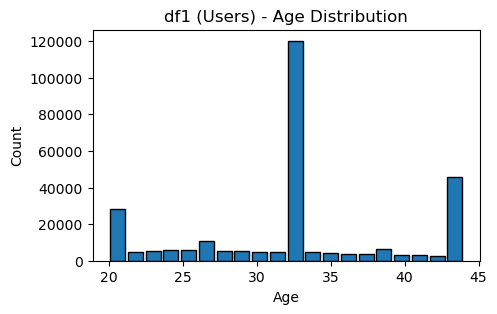

In [25]:
plt.figure(figsize=(5, 3))
plt.hist(df1['Age'], bins=20, rwidth=0.85, edgecolor='black')
plt.title('df1 (Users) - Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

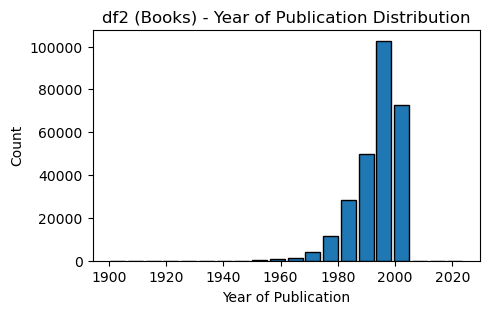

In [26]:
plt.figure(figsize=(5, 3))
plt.hist(df2['Year-Of-Publication'], bins=20, rwidth=0.85, edgecolor='black')
plt.title('df2 (Books) - Year of Publication Distribution')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()

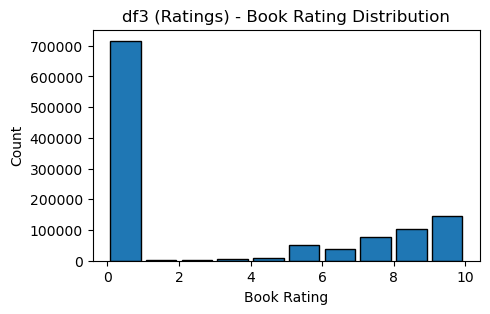

In [27]:
plt.figure(figsize=(5, 3))
plt.hist(df3['Book-Rating'], bins=10, rwidth=0.85, edgecolor='black')
plt.title('df3 (Ratings) - Book Rating Distribution')
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

## Scatter Plots

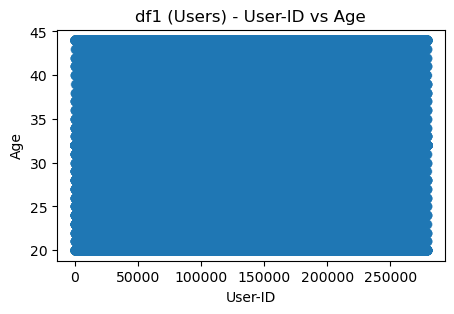

In [28]:
plt.figure(figsize=(5, 3))
plt.scatter(df1['User-ID'], df1['Age'], alpha=0.5)
plt.title('df1 (Users) - User-ID vs Age')
plt.xlabel('User-ID')
plt.ylabel('Age')
plt.show()

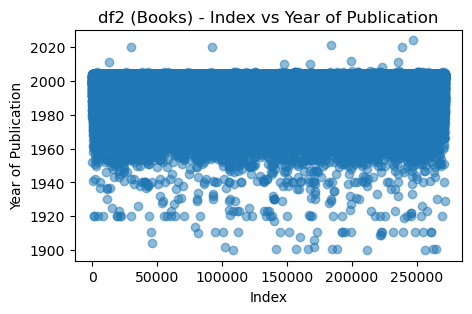

In [29]:
plt.figure(figsize=(5, 3))
plt.scatter(range(len(df2)), df2['Year-Of-Publication'], alpha=0.5)
plt.title('df2 (Books) - Index vs Year of Publication')
plt.xlabel('Index')
plt.ylabel('Year of Publication')
plt.show()


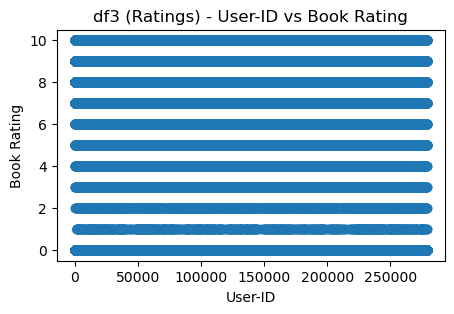

In [30]:
plt.figure(figsize=(5, 3))
plt.scatter(df3['User-ID'], df3['Book-Rating'], alpha=0.5)
plt.title('df3 (Ratings) - User-ID vs Book Rating')
plt.xlabel('User-ID')
plt.ylabel('Book Rating')
plt.show()

## Correlation Analysis & Heatmap

In [31]:
df_temp = pd.merge(df3,df2,on='ISBN',how='inner')

In [32]:
df_final = pd.merge(df_temp,df1,on='User-ID',how='inner')

In [33]:
print(df_final.shape)
df_final.head()

(1031136, 12)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",20.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",20.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",20.0


In [34]:
corr_df = df_final[['Age', 'Year-Of-Publication', 'Book-Rating']]

In [35]:
corr_matrix = corr_df.corr()
print(corr_matrix)

                          Age  Year-Of-Publication  Book-Rating
Age                  1.000000            -0.008654    -0.027687
Year-Of-Publication -0.008654             1.000000     0.038210
Book-Rating         -0.027687             0.038210     1.000000


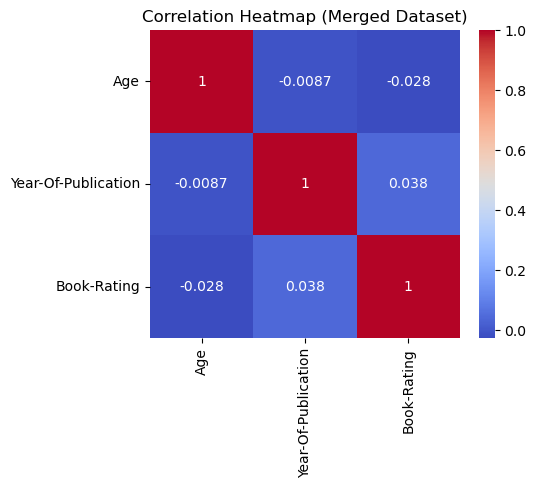

In [36]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Merged Dataset)')
plt.show()

In [37]:
## Scaling

In [38]:
scaler = StandardScaler()
df1["Age_scaled"] = scaler.fit_transform(df1[["Age"]])
df2["Year_scaled"] = scaler.fit_transform(df2[["Year-Of-Publication"]])

In [39]:
print("===== df1 : Users Dataset =====")
display(df1.head())

print("\n===== df2 : Books Dataset =====")
display(df2.head())

print("\n===== df3 : Ratings Dataset =====")
display(df3.head())

===== df1 : Users Dataset =====


,User-ID,Location,Age,Age_scaled
0,1,"nyc, new york, usa",32.0,-0.051141
1,2,"stockton, california, usa",20.0,-1.759831
2,3,"moscow, yukon territory, russia",32.0,-0.051141
3,4,"porto, v.n.gaia, portugal",20.0,-1.759831
4,5,"farnborough, hants, united kingdom",32.0,-0.051141



===== df2 : Books Dataset =====


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year_scaled
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1.026526
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,0.902610
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,-0.336551
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,0.654778
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.654778



===== df3 : Ratings Dataset =====


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Model Building 

In [40]:
books = pd.read_csv("books.csv")
users = pd.read_csv("users.csv")
ratings = pd.read_csv("ratings.csv")

Popularity Based Recommendation  

In [41]:
data = ratings.merge(books, on="ISBN")

popular = data.groupby("Book-Title").agg(
    avg_rating=("Book-Rating", "mean"),
    rating_count=("Book-Rating", "count")
).reset_index()

popular = popular[popular["rating_count"] > 100]

popular.sort_values("avg_rating", ascending=False).head(10)


,Book-Title,avg_rating,rating_count
80434,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
80422,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
195672,The Little Prince,5.815603,141
80441,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
80426,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
60582,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
80414,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
201970,The Perks of Being a Wallflower,5.144231,104
191612,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
187377,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368


Content Based Recommendation 

In [42]:
books["Book-Title"] = books["Book-Title"].fillna("")
books["Book-Author"] = books["Book-Author"].fillna("")
books["Publisher"] = books["Publisher"].fillna("")

In [44]:
books["text"] = books["Book-Title"] + " " + books["Book-Author"] + " " + books["Publisher"]

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(books["text"])


In [46]:
from sklearn.metrics.pairwise import linear_kernel


In [47]:
def recommend(title):
    idx = books[books["Book-Title"] == title].index[0]
    
    scores = linear_kernel(
        tfidf_matrix[idx], tfidf_matrix
    ).flatten()
    
    top = scores.argsort()[-6:-1][::-1]
    
    return books.iloc[top][["Book-Title", "Book-Author"]]


In [48]:
recommend("Harry Potter and the Sorcerer's Stone")


,Book-Title,Book-Author
72185,"Harry Potter and the Sorcerer's Stone (Book 1,...",J. K. Rowling
140443,Harry Potter and the Prisoner of Azkaban (Harr...,J. K. Rowling
259611,Harry Potter and the Sorcerer's Stone,J.K. Rowling
2809,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
55784,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling


User-Based Collaborative Filtering

In [49]:
active_users = ratings["User-ID"].value_counts()
active_users = active_users[active_users >= 50].index

ratings_filtered = ratings[ratings["User-ID"].isin(active_users)]


In [50]:
popular_books = ratings_filtered["ISBN"].value_counts()
popular_books = popular_books[popular_books >= 50].index

ratings_filtered = ratings_filtered[ratings_filtered["ISBN"].isin(popular_books)]

In [51]:
user_book = ratings_filtered.pivot_table(
    index="User-ID",
    columns="ISBN",
    values="Book-Rating"
).fillna(0)


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim = cosine_similarity(user_book)

def user_recommend(user_id):
    if user_id not in user_book.index:
        return "User not found"

    idx = user_book.index.get_loc(user_id)
    sim_users = list(enumerate(user_sim[idx]))
    sim_users = sorted(sim_users, key=lambda x: x[1], reverse=True)[1:6]

    similar_users = [user_book.index[i[0]] for i in sim_users]
    user_books = ratings_filtered[ratings_filtered["User-ID"] == user_id]["ISBN"]

    recs = ratings_filtered[ratings_filtered["User-ID"].isin(similar_users)]
    recs = recs[~recs["ISBN"].isin(user_books)]

    return recs.merge(books, on="ISBN")["Book-Title"].value_counts().head(5)



In [53]:
user_recommend(user_book.index[0]).reset_index().rename(
    columns={"index": "Book-Title", "count": "Recommendation-Score"}
)


,Book-Title,Recommendation-Score
0,Seabiscuit: An American Legend,2
1,Shadow Prey,1
2,"Eats, Shoots &amp; Leaves: The Zero Tolerance ...",1
3,Stupid White Men ...and Other Sorry Excuses fo...,1
4,Waiting (Vintage International),1


Item-Based Collaborative Filtering

In [54]:
item_sim = cosine_similarity(user_book.T)

item_sim_df = pd.DataFrame(
    item_sim,
    index=user_book.columns,
    columns=user_book.columns
)

def item_recommend(isbn):
    if isbn not in item_sim_df.columns:
        return "Book not found"

    similar = item_sim_df[isbn].sort_values(ascending=False)[1:6]
    return books[books["ISBN"].isin(similar.index)][
        ["Book-Title", "Book-Author"]
    ]

item_recommend(user_book.columns[0])


,Book-Title,Book-Author
414,The Robber Bride,Margaret Atwood
973,No Safe Place,RICHARD NORTH PATTERSON
1985,The Handmaid's Tale,Margaret Atwood
5417,Hornet's Nest,Patricia Daniels Cornwell
22353,I'll Take Manhattan,Judith Krantz


SVD (Singular Value Decomposition)   

In [56]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, random_state=42)
matrix_reduced = svd.fit_transform(user_book)

user_sim = cosine_similarity(matrix_reduced)

def svd_recommend_sklearn(user_id):
    if user_id not in user_book.index:
        return "User not found"

    idx = user_book.index.get_loc(user_id)

    scores = list(enumerate(user_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]

    similar_users = [user_book.index[i[0]] for i in scores]

    user_books = ratings_filtered[
        ratings_filtered["User-ID"] == user_id
    ]["ISBN"]

    recs = ratings_filtered[
        ratings_filtered["User-ID"].isin(similar_users)
    ]

    recs = recs[~recs["ISBN"].isin(user_books)]

    return recs.merge(books, on="ISBN")["Book-Title"].value_counts().head(5)


In [57]:
svd_recommend_sklearn(user_book.index[0]) \
    .reset_index() \
    .rename(columns={"index": "Book-Title", "count": "Recommendation-Score"})


,Book-Title,Recommendation-Score
0,The Summons,2
1,Fried Green Tomatoes at the Whistle Stop Cafe,2
2,The Reader,2
3,Chocolat,2
4,Silent Treatment,2
